### Import Libraries
* pandas
* numpy
* seaborn
* matplotlib
* LabelEncoder from sklearn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
pd.set_option('display.max_columns', None)

### Import Data
import `laptops.json` file as a dataframe

In [2]:
df = pd.read_json('laptops.json')

In [3]:
df.head(5)

,brand,processor_brand,processor_name,ram,ram_type,ssd,clock,gpu,gpu_memory,price
0,SAMSUNG,Intel,Core i7,16,LPDDR4X,0.512,5.0,Intel Integrated Iris Xe,0,86990
1,SAMSUNG,Intel,Core i5,8,LPDDR4X,0.512,4.6,Intel Integrated Iris Xe,0,71990
2,HP,Intel,Core i3,8,DDR4,0.512,4.1,Intel Integrated UHD,0,35990
3,HP,Intel,Core i3,8,DDR4,0.512,0.9,Intel Integrated UHD,0,37990
4,HP,AMD,Ryzen 5 Hexa Core,16,DDR4,0.512,4.0,AMD Radeon Radeon Graphics,0,41990


In [4]:
df.describe()

,ram,ssd,clock,gpu_memory,price
count,909.000000,909.000000,909.000000,909.000000,909.000000
mean,12.655666,0.565571,4.012431,2.206821,72690.558856
std,5.073168,0.215159,0.913557,2.762460,39042.243019
min,4.000000,0.256000,0.900000,0.000000,26990.000000
25%,8.000000,0.512000,3.600000,0.000000,46990.000000
50%,16.000000,0.512000,4.400000,0.000000,61990.000000
75%,16.000000,0.512000,4.600000,4.000000,86500.000000
max,32.000000,2.000000,5.600000,8.000000,289990.000000


### Process Categorical Data
convert `Categorical Data` into `Numerical Data` by `Label Encoding` them using sklearn's `LabelEncoder`

In [5]:
brand = LabelEncoder().fit(df['brand'])
processor = LabelEncoder().fit(df['processor_name'])
ram = LabelEncoder().fit(df['ram_type'])
gpu = LabelEncoder().fit(df['gpu'])

In [6]:
data = df.copy()
data['brand'] = brand.transform(data['brand'])
data['processor_name'] = processor.transform(data['processor_name'])
data['ram_type'] = ram.transform(data['ram_type'])
data['gpu'] = gpu.transform(data['gpu'])
data['processor_brand'] = pd.get_dummies(data['processor_brand'],drop_first=True,dtype=int)

In [7]:
data.head()

,brand,processor_brand,processor_name,ram,ram_type,ssd,clock,gpu,gpu_memory,price
0,7,1,2,16,2,0.512,5.0,5,0,86990
1,7,1,1,8,2,0.512,4.6,5,0,71990
2,4,1,0,8,0,0.512,4.1,7,0,35990
3,4,1,0,8,0,0.512,0.9,7,0,37990
4,4,0,6,16,0,0.512,4.0,3,0,41990


In [8]:
data.describe()

,brand,processor_brand,processor_name,ram,ram_type,ssd,clock,gpu,gpu_memory,price
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,3.047305,0.729373,2.586359,12.655666,0.584158,0.565571,4.012431,8.632563,2.206821,72690.558856
std,2.253476,0.444528,2.615287,5.073168,0.988264,0.215159,0.913557,5.409577,2.762460,39042.243019
min,0.000000,0.000000,0.000000,4.000000,0.000000,0.256000,0.900000,0.000000,0.000000,26990.000000
25%,1.000000,0.000000,1.000000,8.000000,0.000000,0.512000,3.600000,5.000000,0.000000,46990.000000
50%,4.000000,1.000000,1.000000,16.000000,0.000000,0.512000,4.400000,7.000000,0.000000,61990.000000
75%,5.000000,1.000000,5.000000,16.000000,1.000000,0.512000,4.600000,13.000000,4.000000,86500.000000
max,7.000000,1.000000,9.000000,32.000000,3.000000,2.000000,5.600000,20.000000,8.000000,289990.000000


### Finding Outliers
Use `Distribution plot` and `Boxplot` to find out outliers w.r.t `Price` and `Clock Speed`

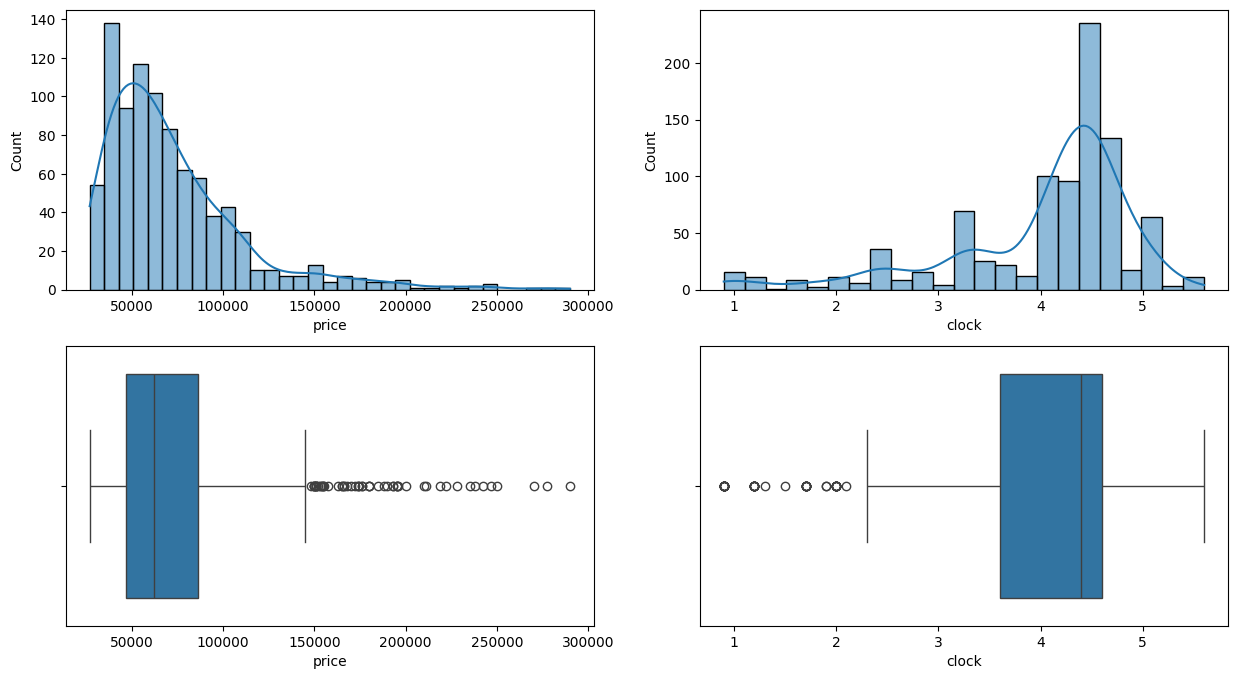

In [9]:
fig,axs = plt.subplots(ncols=2,nrows=2)
fig.set_figwidth(15)
fig.set_figheight(8)
sns.histplot(data['price'],ax=axs[0][0],kde=True)
sns.histplot(data['clock'],ax=axs[0][1],kde=True)
sns.boxplot(x=data['price'],ax=axs[1][0])
sns.boxplot(x=data['clock'],ax=axs[1][1])
plt.show(fig)

From the above plots we came to the following conclusion: Laptops with `Price >= 1,50,000` and `Clock Speed <= 2` are outliers.

In [12]:
data = data.iloc[np.where(data['price']<150000)]
data = data.iloc[np.where(data['clock']>2)]
df = df.iloc[np.where(df['price']<150000)]
df = df.iloc[np.where(df['clock']>2)]

In [13]:
data.describe()

,brand,processor_brand,processor_name,ram,ram_type,ssd,clock,gpu,gpu_memory,price
count,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000
mean,3.059333,0.719407,2.610630,12.242274,0.574784,0.546660,4.129543,8.339926,2.064277,66798.950556
std,2.246326,0.449567,2.610515,4.323622,1.009684,0.187876,0.659676,5.176766,2.578629,26026.654186
min,0.000000,0.000000,0.000000,4.000000,0.000000,0.256000,2.100000,0.000000,0.000000,26990.000000
25%,1.000000,0.000000,1.000000,8.000000,0.000000,0.512000,4.000000,5.000000,0.000000,47499.000000
50%,4.000000,1.000000,1.000000,16.000000,0.000000,0.512000,4.400000,7.000000,0.000000,61990.000000
75%,5.000000,1.000000,5.000000,16.000000,1.000000,0.512000,4.500000,13.000000,4.000000,82990.000000
max,7.000000,1.000000,9.000000,32.000000,3.000000,1.000000,5.400000,20.000000,8.000000,149990.000000


In [14]:
data.to_csv('laptops_train_dataset.csv')
data.to_json('laptops_train_dataset.json')
df.to_json('label_encoder_dataset.json')

### Feature - Price Relationship
Find out how price of laptops gets effected when a particular feature is changed.

##### 1. GPU Memory vs Price

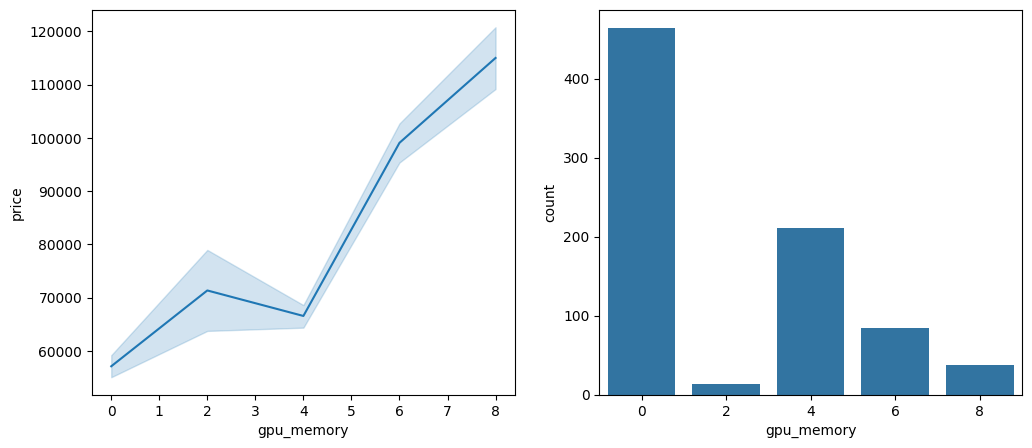

In [15]:
fig,axs = plt.subplots(ncols=2, nrows=1)
fig.set_figwidth(12)
fig.set_figheight(5)

sns.lineplot(x=data['gpu_memory'],y=data['price'],estimator='mean',ax=axs[0])
sns.countplot(x=data['gpu_memory'],ax=axs[1])

plt.show(fig)

* Avg. Price of 2gb GPU Laptops is more than 4gb GPU Laptops. Whereas in rest of the cases Laptop Price Increases when GPU memory Increases.
* Laptops with 2gb GPU memory are very less in number.
* From the dataset we notice that most of 2gb GPUs are Nvidia Geforce MX550.
* From the dataset we also notice that some DELL laptops are overpriced w.r.t their hardware features. They might have some extra features that is increasing their overall price like - Foldability, Touch Screen etc.

In [16]:
df[df['gpu_memory']==2]

,brand,processor_brand,processor_name,ram,ram_type,ssd,clock,gpu,gpu_memory,price
213,DELL,Intel,Core i7,16,DDR5,0.512,3.5,NVIDIA GeForce MX550,2,95990
279,DELL,Intel,Core i5,8,DDR4,0.512,2.4,Intel Integrated UHD,2,64999
286,DELL,Intel,Core i5,8,DDR4,0.256,4.2,Intel Integrated UHD Graphics,2,62200
287,DELL,Intel,Core i5,16,DDR4,0.512,4.2,NVIDIA GeForce MX350,2,89290
297,DELL,Intel,Core i5,16,DDR4,0.512,4.4,NVIDIA GeForce MX550,2,81990
306,DELL,Intel,Core i5,8,DDR4,0.512,4.4,NVIDIA GeForce MX550,2,71990
319,DELL,Intel,Core i5,8,DDR5,0.512,3.3,NVIDIA GeForce MX550,2,83990
328,DELL,Intel,Core i5,16,DDR4,0.512,4.2,NVIDIA GeForce MX350,2,59899
438,Lenovo,Intel,Core i5,8,DDR4,0.512,4.2,NVIDIA GeForce MX350,2,84086
584,Acer,Intel,Core i5,8,DDR4,0.512,4.2,NVIDIA GeForce MX350,2,59999


##### 2. RAM Size vs Price and RAM Type vs Price

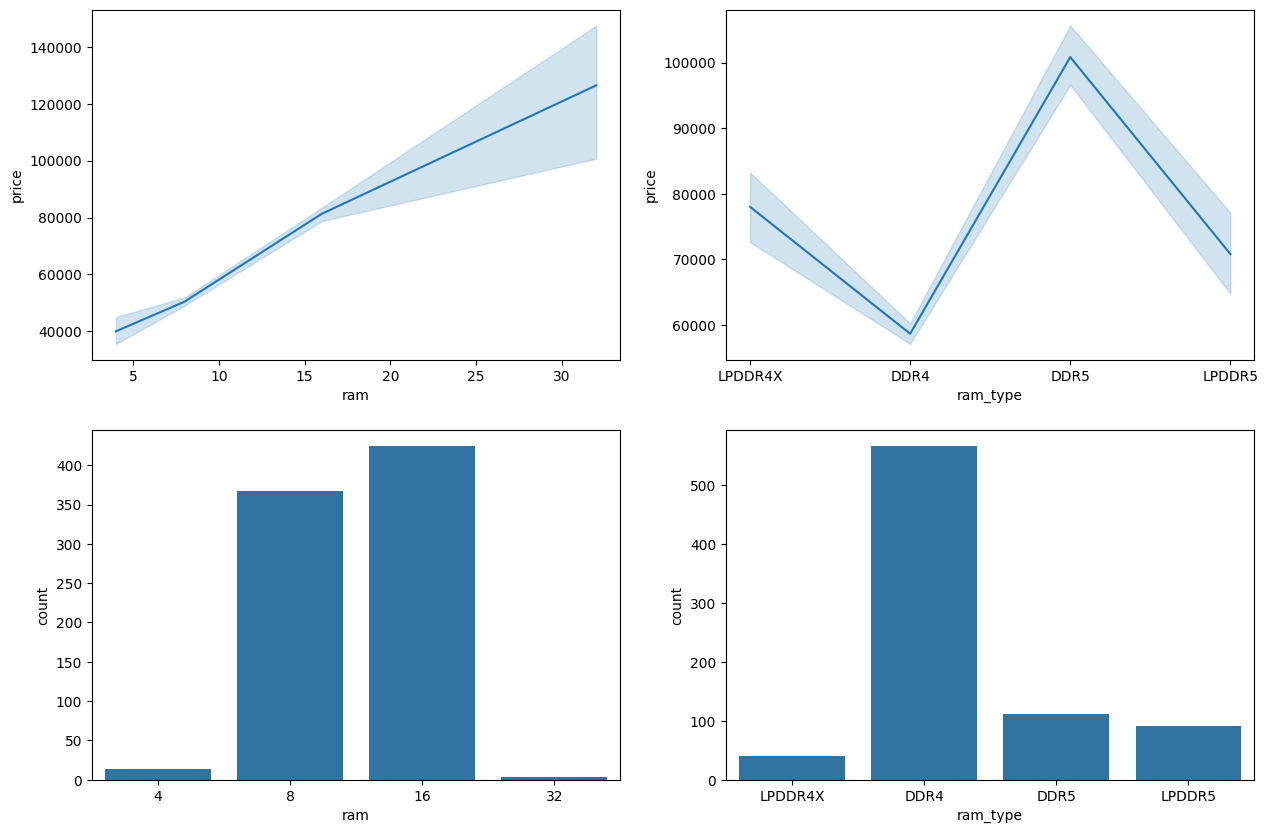

In [17]:
fig,axs = plt.subplots(ncols=2, nrows=2)
fig.set_figwidth(15)
fig.set_figheight(10)

sns.lineplot(x=df['ram'],y=data['price'],estimator='mean',ax=axs[0][0])
sns.lineplot(x=df['ram_type'],y=data['price'],estimator='mean',ax=axs[0][1])
sns.countplot(x=df['ram'],ax=axs[1][0])
sns.countplot(x=df['ram_type'],ax=axs[1][1])

plt.show(fig)

##### 3. SSD size vs Price

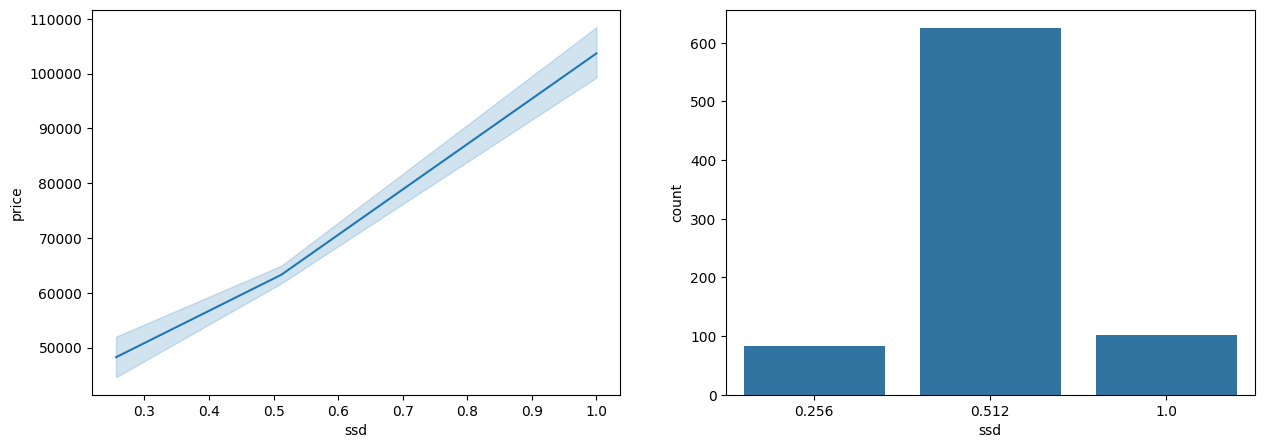

In [18]:
fig,axs = plt.subplots(ncols=2, nrows=1)
fig.set_figwidth(15)
fig.set_figheight(5)

sns.lineplot(x=df['ssd'],y=data['price'],estimator='mean',ax=axs[0])
sns.countplot(x=df['ssd'],ax=axs[1])

plt.show(fig)

##### 4. Brand vs Price
Price comparison between different laptop brands while also considering the cpu brand - Intel or AMD.

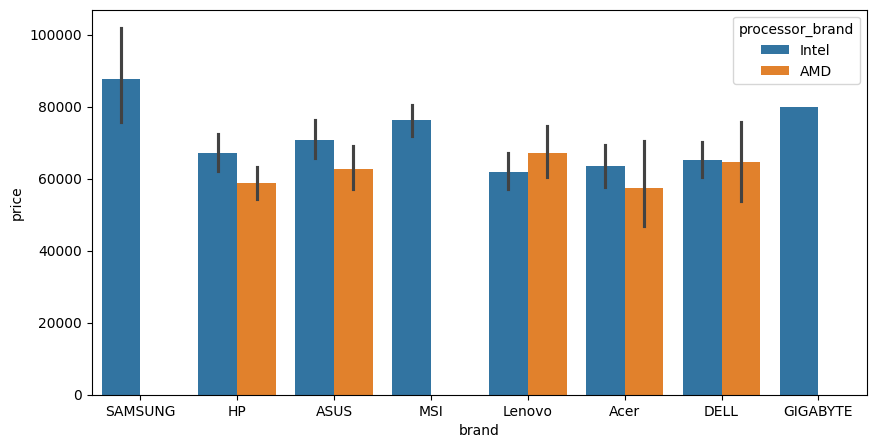

In [19]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=df['brand'],y=df['price'],hue=df['processor_brand'])
plt.show(fig)

### Popular Choices
Mostly sold Laptop brands and components.

##### 1. Mostly sold Laptop Brands

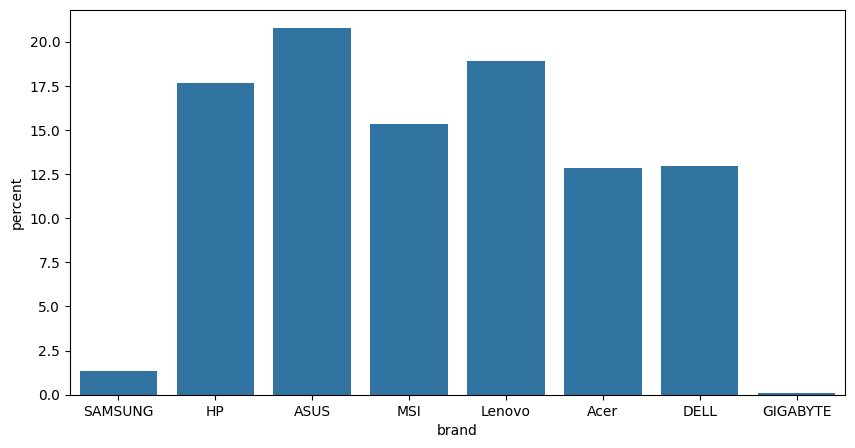

In [20]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x=df['brand'],stat='percent')
plt.show(fig)

##### 2. Most popular CPU Brands

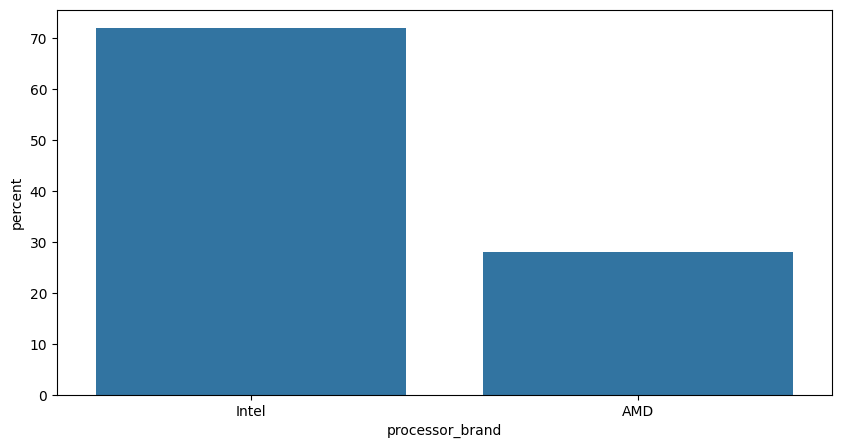

In [21]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x=df['processor_brand'],stat='percent')
plt.show(fig)

##### 3. Mostly used RAM sizes and types

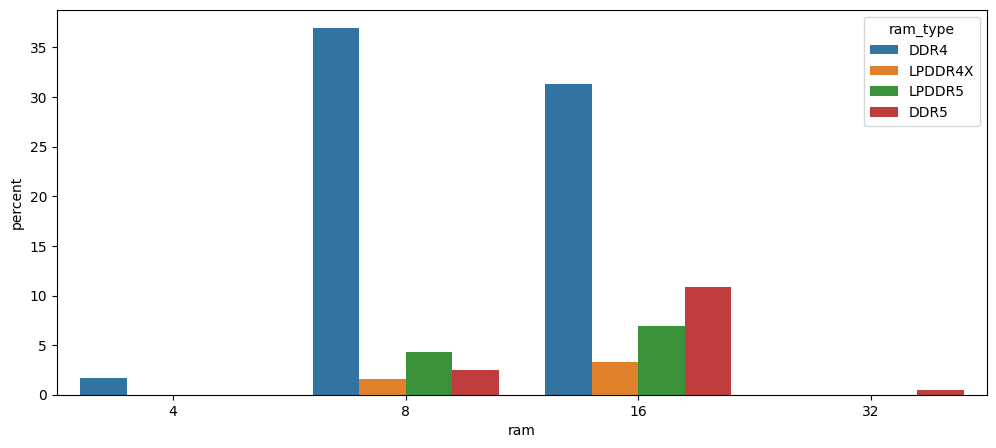

In [22]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x=df['ram'],hue=df['ram_type'],stat='percent')
plt.show(fig)

##### 3. Most Popular GPUs

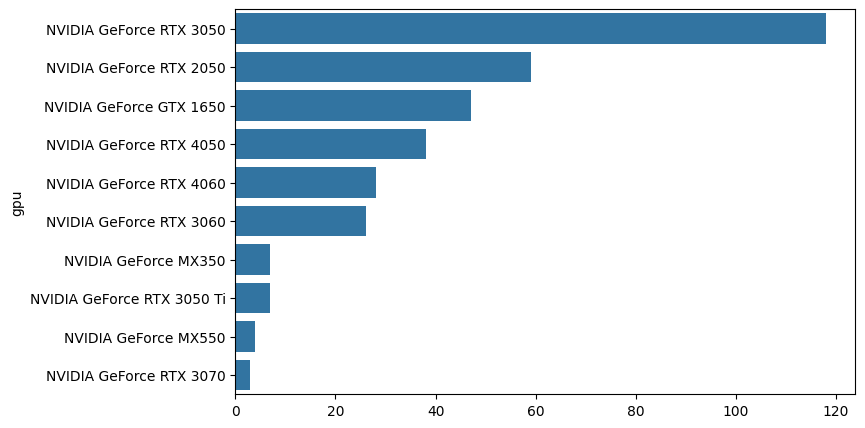

In [23]:
popular_gpu = df[df['gpu_memory']>0].groupby(['gpu']).count().sort_values(ascending=False,by=['brand']).head(10)
fig = plt.figure(figsize=(8,5))
sns.barplot(y=popular_gpu.index,x=(list(popular_gpu['brand'].values)))
plt.show(fig)

##### 4. Most Popular CPUs

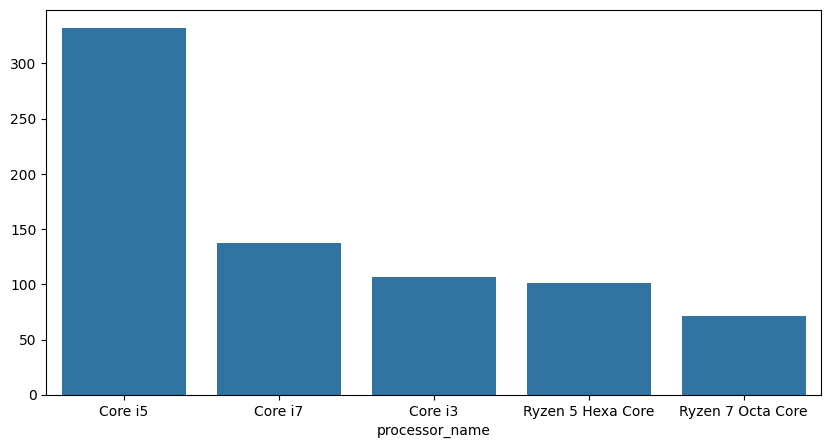

In [24]:
popular_gpu = df.groupby(['processor_name']).count().sort_values(ascending=False,by=['brand']).head(5)
fig = plt.figure(figsize=(10,5))
sns.barplot(x=popular_gpu.index,y=(list(popular_gpu['brand'].values)))
plt.show(fig)